In [1]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA

# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame

from matplotlib import pyplot as plt
import seaborn as sb

import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

## 문제 (1)


다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.

https://data.hossam.kr/E04/diabetes.xlsx

|변수|	설명|
|--|--|
age|	나이
sex	|성별
bmi|	bmi지수(비만도)
bp|	평균 혈압
s1~s6	|6종류의 혈액검사 수치
target|	당뇨병 진행률(종속변수)


주어진 데이터는 표준화가 적용되어 있다.
이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

남자에 대한 당뇨에 걸리는 확률 등을 t-test + 분산분석 가설 검정을 하고 넣어야 한다. 유의미한 차이가 있으면 넣는다. 
1과 0 두가지의 경우라면 표준화 안해도 된다. 2진 데이터니까 
그러나 연령대처럼 종류가 많은 경우 표준화를 해야 한다. (근데 이것도 야매고, 정석은 1,0,0,0 -> 0,1,0,0 이런식으로 임베디드(?) 해야 함)

명목형 변수가 y축에 유의미한 차이가 있어서 사용한다면, 이를 통제요인이라고 부르고 적용한다. 

독립변수와 종속변수를 어떻게 처리해야 하지?

독립변수와 종속변수를 무조건 나눔 -> 머신러닝 (지도학습용 데이터로 재구성 하는거)
안나눔 -> 통계 패키지

In [4]:
df=read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


In [5]:
# 데이터 전처리 , 독립변수 컬럼만 추출 
x_train = df.drop("target",axis=1)# y축에 해당하는 값을 삭제
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
# 표준화 결과를 데이터 프레임으로 재구성
std_df = DataFrame(x_train, columns = x_train.columns)
std_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
# PCA 패키지를 사용한 분석 (추천)
# 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
model = pca(n_components=len(std_df.columns))
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(std_df)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':            age       sex       bmi        bp        s1        s2        s3  \
 PC1   0.216431  0.186967  0.303162  0.271738  0.343255  0.351861 -0.282437   
 PC2   0.044367 -0.386547 -0.156281 -0.138266  0.573027  0.455942  0.506239   
 PC3   0.494668 -0.106864  0.167527  0.513571 -0.068579 -0.269689  0.386032   
 PC4  -0.414012 -0.679860  0.499825 -0.019662 -0.068396 -0.167774 -0.076020   
 PC5  -0.686876  0.373464  0.129333  0.486874  0.129180  0.116722  0.245001   
 PC6  -0.225815  0.041705 -0.403151 -0.272783  0.005398 -0.133262  0.106354   
 PC7  -0.109530 -0.067622 -0.519874  0.320655  0.073644 -0.230535 -0.007548   
 PC8   0.014937  0.442933  0.392922 -0.477360  0.129411 -0.191325  0.324635   
 PC9   0.008100 -0.002106  0.042377  0.027194 -0.042038 -0.359316  0.481247   
 PC10  0.003263  0.003660  0.008247 -0.003222  0.709775 -0.563195 -0.317445   
 
             s4        s5        s6  
 PC1   0.428834  0.378618  0.322183  
 PC2  -0.068181 -0.026187 -0.084949  
 PC

In [9]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC9,s4,0.773817,best
9,PC10,s1,0.709775,best


In [10]:
best = topfit.query('type=="best"')
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC9,s4,0.773817,best
9,PC10,s1,0.709775,best


In [11]:
best = topfit.query("type=='best'")
feature = list(set(best['feature']))
feature

['bp', 'sex', 's4', 's6', 's1', 's5', 'age']

In [12]:
ols = my_ols(df, "target",feature)
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        14:28:01   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
bp           456.9719     68.115      6.709      0.000     323.095     590.849
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
s4           412.2661     84.704      4.867      0.000     245.785     578.747
s6           150.1445     70.100      2.142      0.033      12.366     287.923
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
s5           642.7408     82.452      7.795      0.000     480.686     804.795
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
ols.table


B    표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                 
target bp     456.9719  68.115  0   6.709*  0.000   1.468583
       sex   -290.7876  64.800  0  -4.487*  0.000   1.283075
       s4     412.2661  84.704  0   4.867*  0.000   8.893714
       s6     150.1445  70.100  0   2.142*  0.033   1.485021
       s1    -358.8123  74.225  0  -4.834*  0.000  59.257108
       s5     642.7408  82.452  0   7.795*  0.000  10.125073
       age     -8.6419  64.182  0  -0.135*  0.893   1.217315

In [15]:
당뇨 = df['target']
당뇨

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: target, Length: 442, dtype: int64

In [16]:
예측당뇨 = ols.fit.predict(df.filter(feature))
예측당뇨

0      172.007474
1       82.086360
2      147.306696
3      172.080542
4      145.020055
          ...    
437    186.443274
438     98.010573
439    125.962704
440    195.884545
441     79.722162
Length: 442, dtype: float64

In [17]:
result_df = DataFrame({
    "당뇨":예측당뇨,
    "예측당뇨":예측당뇨
})
result_df

,당뇨,예측당뇨
0,172.007474,172.007474
1,82.086360,82.086360
2,147.306696,147.306696
3,172.080542,172.080542
4,145.020055,145.020055
...,...,...
437,186.443274,186.443274
438,98.010573,98.010573
439,125.962704,125.962704
440,195.884545,195.884545


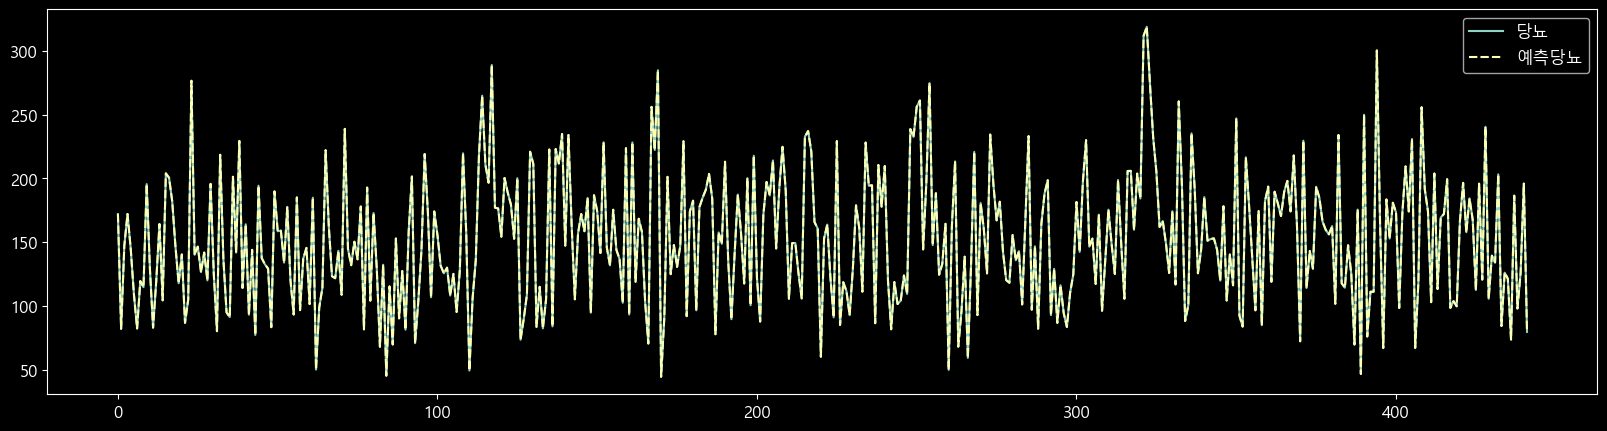

In [18]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

sb.lineplot(data=result_df.filter(['당뇨','예측당뇨']))
plt.show()
plt.close()

## 문제 (2)

다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 rent이다. 분석하라

https://data.hossam.kr/E04/manhattan.xlsx

In [19]:
df=read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [20]:
x_train = df.drop("rent",axis=1)# y축에 해당하는 값을 삭제
x_train

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [28]:
x_train = df.drop(['neighborhood','borough'],axis=1) # 문자 그냥 지움 
x_train

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [25]:
# scaler = StandardScaler()
# x_train_std = scaler.fit_transform(x_train[['size_sqft','bathrooms','min_to_subway','floor','building_age_yrs']])
# x_train_std

array([[-0.96201105, -0.61179008,  0.7308622 , -0.90409672, -0.88876267],
       [ 2.2186935 ,  1.05625699, -0.17611631, -0.99534305,  1.11759321],
       [-0.04965106, -0.61179008, -0.53890772,  3.5669736 , -0.58399975],
       ...,
       [-1.44330187, -0.61179008, -0.53890772, -0.63035772,  1.11759321],
       [-0.60418179, -0.61179008,  0.18667509, -0.63035772, -0.9649534 ],
       [-0.25890794, -0.61179008, -0.17611631, -0.08287972, -1.09193795]])

In [29]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_train_std

array([[-0.81866889, -1.39741035, -0.61179008, ...,  2.09442254,
        -0.24148167,  2.17193139],
       [ 2.01147993,  0.66986323,  1.05625699, ..., -0.47745857,
        -0.24148167, -0.4604197 ],
       [-0.20204429, -0.36377356, -0.61179008, ...,  2.09442254,
        -0.24148167, -0.4604197 ],
       ...,
       [-1.08777019, -1.39741035, -0.61179008, ..., -0.47745857,
        -0.24148167, -0.4604197 ],
       [-0.52616747, -0.36377356, -0.61179008, ...,  2.09442254,
        -0.24148167,  2.17193139],
       [-0.20204429, -0.36377356, -0.61179008, ..., -0.47745857,
         4.14110106,  2.17193139]])

In [30]:
std_df = DataFrame(x_train_std, columns = x_train.columns)
std_df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-0.818669,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931
1,2.011480,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420
2,-0.202044,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420
3,-0.108760,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931
4,3.908786,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931


In [33]:
# 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
model = pca(n_components=len(std_df.columns))
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(std_df)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[15]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':           rent  bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
 PC1   0.321770  0.271256   0.308260   0.325412       0.026965  0.111168   
 PC2   0.377689  0.381214   0.389898   0.400889       0.050595  0.049366   
 PC3   0.032718 -0.111053   0.004837  -0.092059       0.318074  0.536472   
 PC4  -0.003249 -0.016665   0.012133  -0.005395      -0.071216 -0.060963   
 PC5  -0.078381  0.096410   0.031382   0.000442       0.715512 -0.406003   
 PC6  -0.068210  0.004084  -0.022723  -0.033083       0.577510 -0.022032   
 PC7  -0.037097  0.114678   0.090496   0.031950      -0.073105 -0.356405   
 PC8  -0.043218  0.055135  -0.077517   0.020403       0.158262  0.559553   
 PC9   0.001605  0.004671  -0.008389  -0.027681       0.010210 -0.049066   
 PC10  0.016930  0.012960   0.023226  -0.013731      -0.074905 -0.259613   
 PC11  0.027187 -0.070942   0.022469  -0.004572       0.010589  0.044886   
 PC12  0.545546 -0.786659   0.050395   0.171573       0.089150 -0.104383   


In [34]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,has_elevator,0.353998,best
1,PC2,size_sqft,0.400889,best
2,PC3,building_age_yrs,-0.637363,best
3,PC4,has_patio,0.742978,best
4,PC5,min_to_subway,0.715512,best
5,PC6,min_to_subway,0.577510,best
6,PC7,no_fee,0.671562,best
7,PC8,building_age_yrs,0.668002,best
8,PC9,has_roofdeck,0.801676,best
9,PC10,has_dishwasher,-0.653026,best


In [35]:
best = topfit.query('type=="best"')
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,has_elevator,0.353998,best
1,PC2,size_sqft,0.400889,best
2,PC3,building_age_yrs,-0.637363,best
3,PC4,has_patio,0.742978,best
4,PC5,min_to_subway,0.715512,best
5,PC6,min_to_subway,0.577510,best
6,PC7,no_fee,0.671562,best
7,PC8,building_age_yrs,0.668002,best
8,PC9,has_roofdeck,0.801676,best
9,PC10,has_dishwasher,-0.653026,best


In [36]:
best = topfit.query("type=='best'")
feature = list(set(best['feature']))
feature

['has_patio',
 'bathrooms',
 'size_sqft',
 'has_dishwasher',
 'has_gym',
 'no_fee',
 'bedrooms',
 'building_age_yrs',
 'min_to_subway',
 'has_elevator',
 'has_roofdeck']

In [38]:
ols = my_ols(std_df, "rent",feature)
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1095.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:57:54   Log-Likelihood:                -2393.4
No. Observations:                3539   AIC:                             4811.
Df Residuals:                    3527   BIC:                             4885.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.346e-17      0.008  -1.17e-14      1.000      -0.016       0.016
has_patio           -0.0042      0.008     -0.515      0.607      -0.020       0.012
bathrooms            0.2250      0.014     15.734      0.000       0.197       0.253
size_sqft            0.7566      0.015     49.049      0.000       0.726       0.787
has_dishwasher      -0.0015      0.009     -0.164      0.870      -0.019       0.016
has_gym             -0.0044      0.011     -0.393      0.695      -0.026       0.018
no_fee              -0.0149      0.008     -1.759      0.079      -0.031       0.002
bedrooms            -0.1021      0.013     -7.748      0.000      -0.128      -0.076
building_age_yrs    -0.1229      0.009    -14.401      0.000      -0.140      -0.106
min_to_subway       -0.0279      0.008     -3.395      0.001      -0.044      -0.012
has_elevator         0.0070      0.011      0.621      0.535      -0.015       0.029
has_roofdeck         0.0051      0.010      0.504      0.614      -0.015       0.025
==============================================================================
Omnibus:                      971.498   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10217.441
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                      11.081   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
ols.table

B   표준오차  β         t   유의확률       VIF
종속변수 독립변수                                                          
rent has_patio         -0.0042  0.008  0   -0.515*  0.607  1.042141
     bathrooms          0.2250  0.014  0   15.734*  0.000  3.411981
     size_sqft          0.7566  0.015  0   49.049*  0.000  6.240452
     has_dishwasher    -0.0015  0.009  0   -0.164*  0.870  1.411565
     has_gym           -0.0044  0.011  0   -0.393*  0.695  2.123456
     no_fee            -0.0149  0.008  0   -1.759*  0.079  1.131116
     bedrooms          -0.1021  0.013  0   -7.748*  0.000  2.754803
     building_age_yrs  -0.1229  0.009  0  -14.401*  0.000  1.340466
     min_to_subway     -0.0279  0.008  0   -3.395*  0.001  1.052625
     has_elevator       0.0070  0.011  0    0.621*  0.535  2.546843
     has_roofdeck       0.0051  0.010  0    0.504*  0.614  1.601198

In [40]:
실제집값 = df['rent']
실제집값

0        2550
1       11500
2        4500
3        4795
4       17500
        ...  
3534     4210
3535     6675
3536     1699
3537     3475
3538     4500
Name: rent, Length: 3539, dtype: int64

In [45]:
예측집값 = ols.fit.predict(df.filter(feature))
예측집값

0        361.035143
1       1501.497261
2        689.541909
3        733.897064
4       3615.038561
           ...     
3534     400.565361
3535     746.494331
3536     177.513874
3537     490.755813
3538     616.279399
Length: 3539, dtype: float64

In [46]:
result_df = DataFrame({
    "실제집값":실제집값,
    "예측집값":예측집값
})
result_df

,실제집값,예측집값
0,2550,361.035143
1,11500,1501.497261
2,4500,689.541909
3,4795,733.897064
4,17500,3615.038561
...,...,...
3534,4210,400.565361
3535,6675,746.494331
3536,1699,177.513874
3537,3475,490.755813


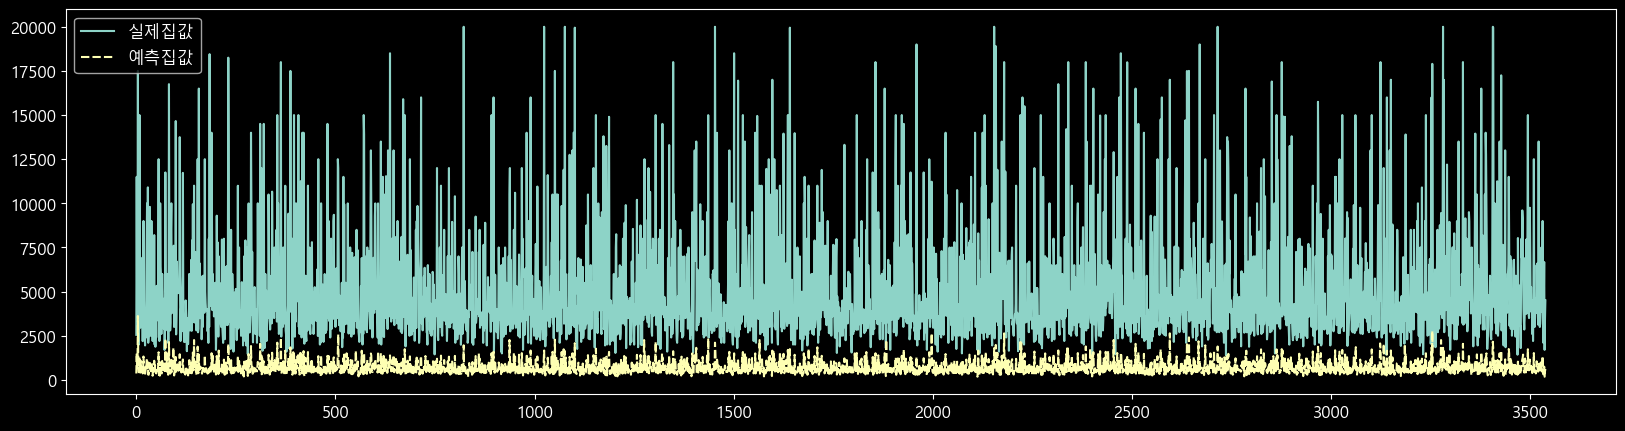

In [47]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

sb.lineplot(data=result_df.filter(['실제집값','예측집값']))
plt.show()
plt.close()